### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
# converting color mode from BGR to RGB and displaying the image as matplotlib figure
def matplotlib_imshow_bgr2rgb(img_title="", mat_img=None, fig_h=7):

    # tinkering with size
    try:
        img_width, img_height = mat_img.shape[0], mat_img.shape[1]
        aspect_ratio = img_width/img_height
        plt.figure(figsize=(fig_h*aspect_ratio, fig_h))
    except AttributeError:
        print("None Type image. Correct_syntax is, matplotlib_imshow_bgr2rgb(img_title, mat_img, fig_h).")

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(mat_img, cv.COLOR_BGR2RGB))
    plt.title(img_title)
    plt.show()
    

## Drawing different shapes on an image (line, rectangle, circle, ellipse, polygons etc.) [[Docs]](https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html)

##### First, let's create a grayscale canvas

In [4]:
def gray_canvas(canvas_size=(400, 400), color_code=125):
    canvas = np.full(canvas_size, color_code, np.uint8)
    return canvas

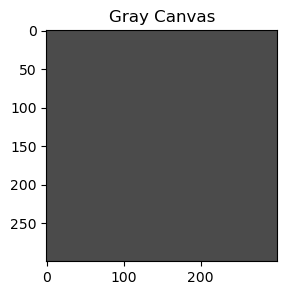

In [5]:
canvas = gray_canvas((300, 300), 75)
matplotlib_imshow_bgr2rgb("Gray Canvas", canvas, 3)

- ### Drawing line

`cv.line(img, start, end, color, thickness, lineType)`

<u>Parameters:</u>
- img: image to draw on
- start: starting coordinate as a tuple (x,y)
- end: ending coordinate as a tuple (x,y)
- color: color code as a tuple, **e.g,** (r, g, b [,alpha])
- thickness: drawing line thickness
- [lineType](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#gaf076ef45de481ac96e0ab3dc2c29a777)

<u>Some things to know:</u>
- This operation changes the original image inplace. If you don't want that, then use copy.deepcopy(img) function to copy your image beforehand.

In [6]:
line_canvas = copy.deepcopy(canvas)

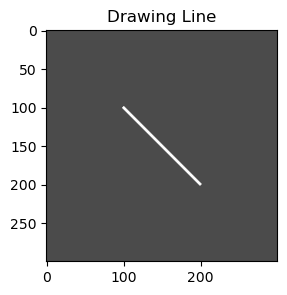

In [7]:
cv.line(line_canvas, (100, 100), (200, 200), color=(255, 255), thickness=2)
matplotlib_imshow_bgr2rgb("Drawing Line", line_canvas, 3)

- ### Drawing polygon

`cv.polylines(img, [points], isClosed, color, thickness)`

<u>Parameters:</u>
- points: an array of points using which the polygon will be drawn
- isClosed: isClosed=True will join the first and last point

<u>Some things to know:</u>
- This operation changes the original image inplace. If you don't want that, then use copy.deepcopy(img) function to copy your image beforehand.
- *The points array needs to be reshaped as **(4, 1, 2)***

In [8]:
poly_canvas = copy.deepcopy(canvas)

In [9]:
points = np.array([[50, 225], [75, 275], [250, 100], [75, 265]], np.int32).reshape(4, 1, 2)

In [10]:
points.shape

(4, 1, 2)

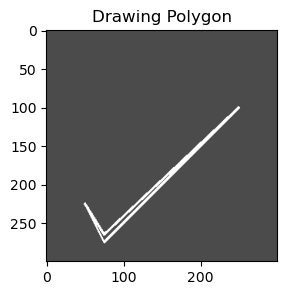

In [11]:
cv.polylines(poly_canvas, [points], isClosed=True, color=(255, 255), thickness=2)
matplotlib_imshow_bgr2rgb("Drawing Polygon", poly_canvas, 3)

- ### Drawing rectangle

`cv.rectangle(img, start, end, color, thickness)`

<u>Parameters:</u>
- start: starting vertex (top left corner coordinate) as a tuple (x,y)
- end: opposite vertex (bottom right corner coordinate) as a tuple (x,y)

<u>Some things to know:</u>
- This operation changes the original image inplace. If you don't want that, then use copy.deepcopy(img) function to copy your image beforehand.
- If, thickness is negative int, the rectangle will be filled with color.

In [12]:
rectangle_canvas = copy.deepcopy(canvas)

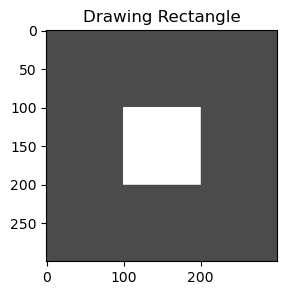

In [13]:
cv.rectangle(rectangle_canvas, (100, 100), (200, 200), color=(255, 255), thickness=-2)
matplotlib_imshow_bgr2rgb("Drawing Rectangle", rectangle_canvas, 3)

- ### Drawing circle

`cv.circle(img, center, radius, color, thickness)`

<u>Parameters:</u>
- center: center point coordinate as a tuple (x,y)
- radius: circle radius

<u>Some things to know:</u>
- This operation changes the original image inplace. If you don't want that, then use copy.deepcopy(img) function to copy your image beforehand.
- If, thickness is negative int, the circle will be filled with color.

In [14]:
circle_canvas = copy.deepcopy(canvas)

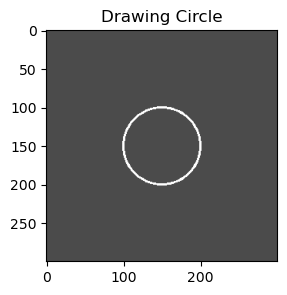

In [15]:
cv.circle(circle_canvas, (150, 150), 50, color=(255, 255), thickness=2)
matplotlib_imshow_bgr2rgb("Drawing Circle", circle_canvas, 3)

## Putting Text on the image

`cv.putText(img, text, text_coordinate, fontFace, fontScale, color, thickness, lineType)`

<u>Parameters:</u>
- img: image to put text on
- text: Text string to be drawn
- text_coordinate: Bottom-left corner of the text string in the image
- fontFace: Font type, see [HersheyFonts](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga0f9314ea6e35f99bb23f29567fc16e11).
- fontScale: Font scale factor that is multiplied by the font-specific base size


<u>Some things to know:</u>
- This operation changes the original image inplace. If you don't want that, then use copy.deepcopy(img) function to copy your image beforehand.

In [16]:
text_canvas = copy.deepcopy(canvas)

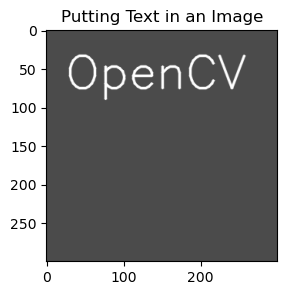

In [17]:
cv.putText(text_canvas, "OpenCV", (25, 75), cv.FONT_ITALIC, fontScale=2, color=(255, 255), thickness=2, lineType=cv.LINE_AA)
matplotlib_imshow_bgr2rgb("Putting Text in an Image", text_canvas, 3)